In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
customers = pd.read_csv('Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


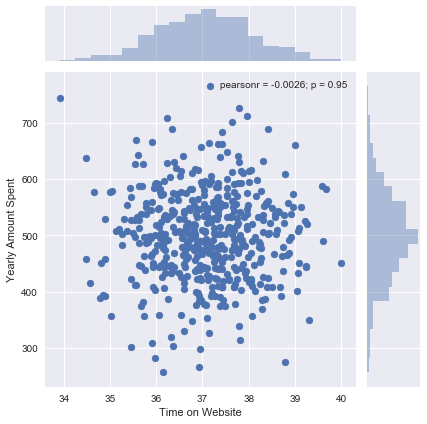

In [7]:
sns.jointplot(data=customers,x='Time on Website',y='Yearly Amount Spent')

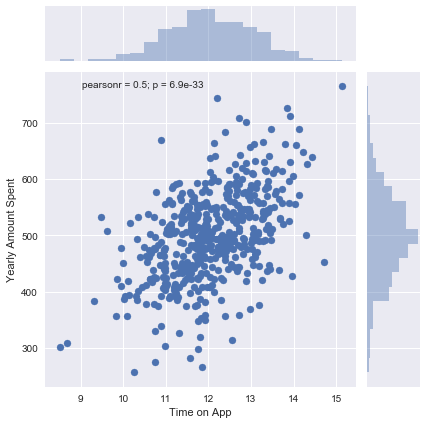

In [8]:
sns.jointplot(data=customers,x='Time on App',y='Yearly Amount Spent')

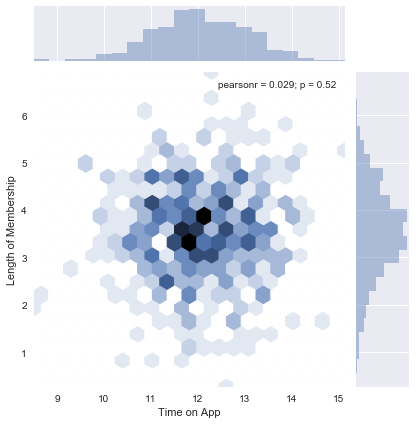

In [9]:
sns.jointplot(data=customers,x='Time on App',y='Length of Membership',kind='hex')

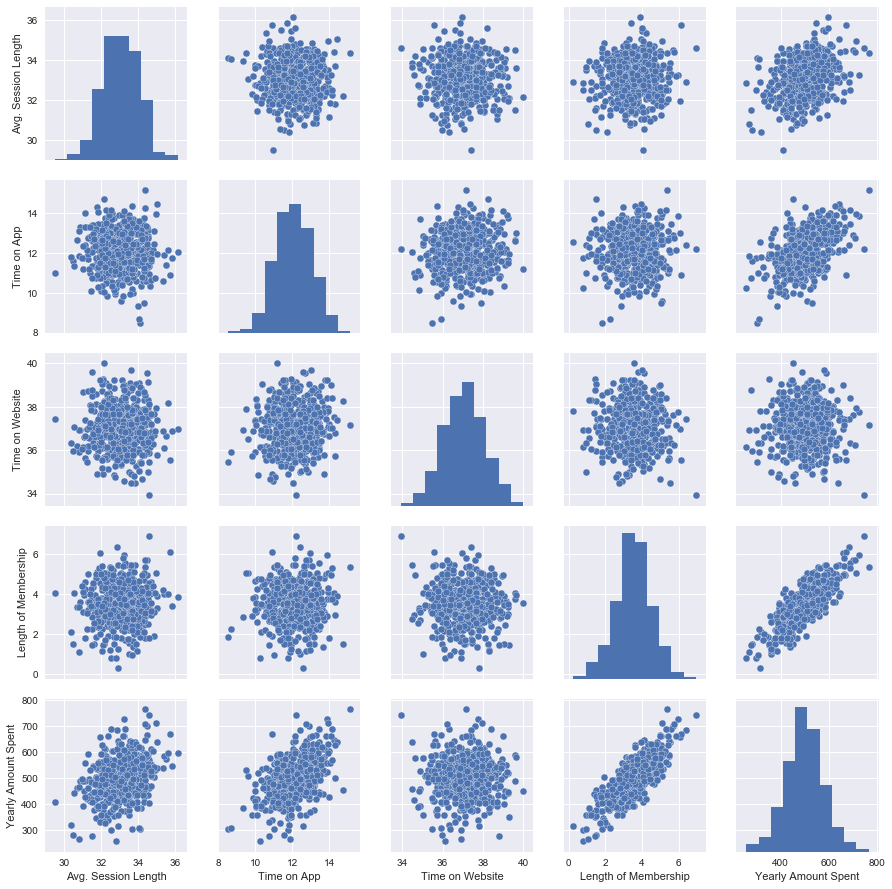

In [10]:
sns.pairplot(customers)

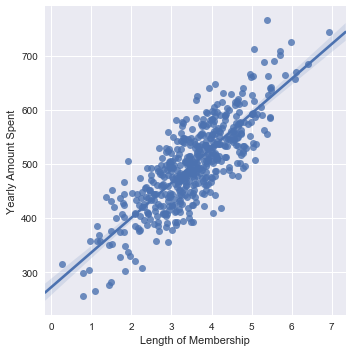

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent', data=customers)

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
y = customers['Yearly Amount Spent']

In [16]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm.coef_

array([  2.57675297e+01,   3.88003936e+01,  -1.80409231e-02,
         6.18525679e+01])

In [22]:
predictions = lm.predict(X_test)

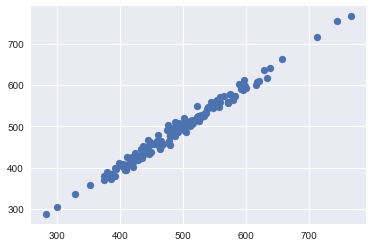

In [23]:
plt.scatter(y_test, predictions)

In [73]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mean = np.mean(predictions)

result1 = []
result2 = []

# Calculate MAE/MSE/RMSE manually.
for i,k in enumerate(predictions):
    
    # Take the absolute value of the difference between actual value and predicted.
    r = np.abs(y_test.values[i] - predictions[i])
    result1.append(r)
    
    # For MSE.
    result2.append(r ** 2)
    
print(mean, np.mean(result1), np.mean(result2), np.sqrt(np.mean(result2)))

# Variations of the difference of the predictions and the true values. Loss functions.

MAE 7.85137717086
MSE 94.5577947927
RMSE 9.72408323662
494.225251884 7.85137717086 94.5577947927 9.72408323662


In [28]:
metrics.explained_variance_score(y_test, predictions)

0.98493927552529903

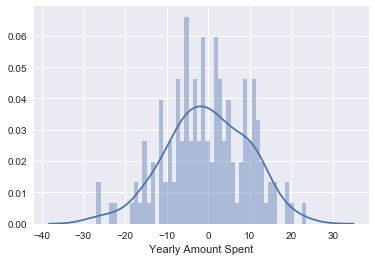

In [31]:
sns.distplot((y_test - predictions), bins=50)

In [33]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

# One unit increase in Avg. Session Length will gain increase of 25.76 dollars spent. = $$$

,Coeff
Avg. Session Length,25.767530
Time on App,38.800394
Time on Website,-0.018041
Length of Membership,61.852568
